##                                        Price Prediction using Linear Regression

### The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. 

Each record in the database describes a Boston suburb or town. The attributes are deﬁned as follows:

- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to ﬁve Boston employment centers
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per $10,000

- PTRATIO: pupil-teacher ratio by town.
- B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town.
- LSTAT: % lower status of the population
- MEDV: Median value of owner-occupied homes in $1000s

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the dataset
boston_data =  pd.read_csv(r'C:\Users\Shahab\Downloads\boston-1.csv')

# Display the first few rows of the dataset
boston_data.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#### Here's a brief overview of the columns for famous Boston Housing dataset, commonly used for regression analysis.

In [ ]:
# Checking for missing values, data types and basic statistical information
missing_values = boston_data.isnull().sum()

data_types = boston_data.dtypes
basic_stats = boston_data.describe()

print(missing_values)
print('\n',data_types)
print('\n',basic_stats)

#### The dataset does not have any missing values. The data types are appropriate for each feature, with most being float64 and a few int64. The basic statistical information provides some insights into the range and distribution of each feature.

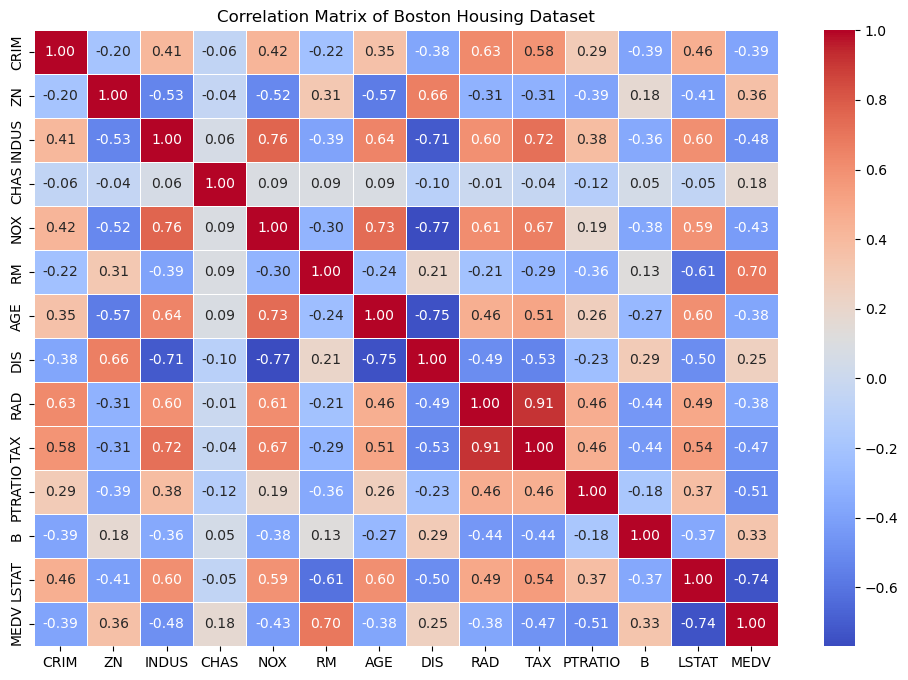

In [14]:
# Correlation matrix
correlation_matrix = boston_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Boston Housing Dataset')
plt.show()


#### The heatmap displays the correlation matrix for the Boston Housing dataset. Here are some key observations relevant to linear regression:

High Correlations with Target Variable (MEDV): Several features show a significant correlation with the target variable MEDV (Median value of owner-occupied homes). 

For instance, RM (average number of rooms per dwelling) has a strong positive correlation, while LSTAT (percentage of lower status of the population) shows a strong negative correlation.

Multicollinearity among Features: 

There are some pairs of features that exhibit high correlation with each other, which indicates multicollinearity. For example, NOX (nitric oxides concentration) and INDUS (proportion of non-retail business acres per town) are highly correlated, as are AGE (proportion of owner-occupied units built prior to 1940) and NOX. RAD (index of accessibility to radial highways) and TAX (full-value property-tax rate) also show high correlation.

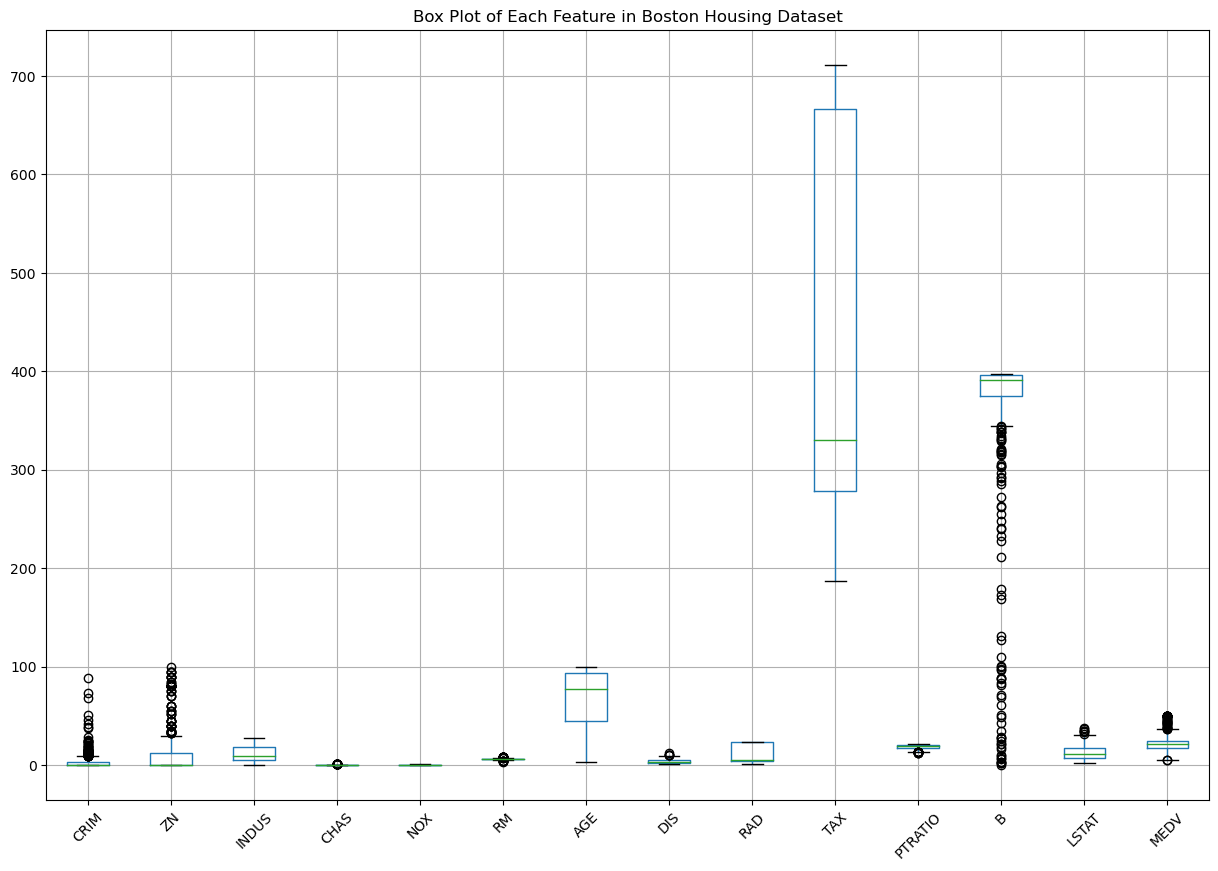

In [3]:
# Plotting box plots for each feature in the dataset to visualize outliers
plt.figure(figsize=(15, 10))
boston_data.boxplot()
plt.xticks(rotation=45)
plt.title('Box Plot of Each Feature in Boston Housing Dataset')
plt.show()

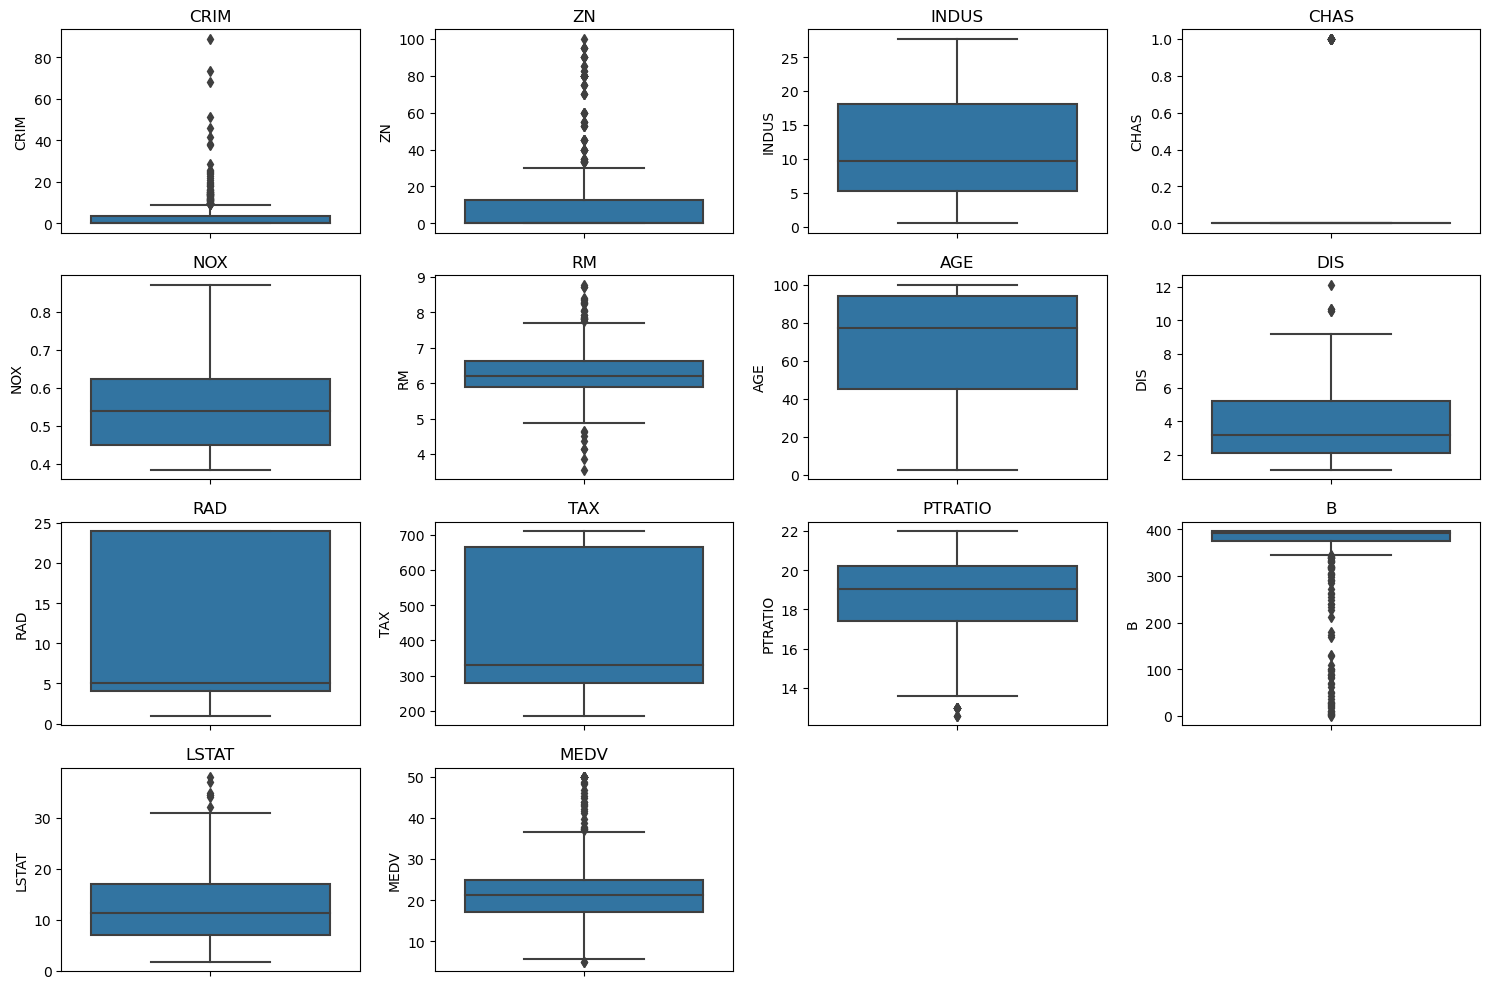

In [4]:
# Setting up the plotting area
plt.figure(figsize=(15, 10))

# Plotting boxplots for each column to identify outliers
for i, column in enumerate(boston_data.columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=boston_data[column])
    plt.title(column)
    
plt.tight_layout()
plt.show()


#### Detecting and handling outliers is an important step in data preprocessing, especially for linear regression models, as outliers can significantly skew the results. There are several methods to detect outliers, but a common approach is to use box plots and statistical criteria (like the IQR method).

In [13]:
# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = boston_data.columns
vif_data["VIF"] = [variance_inflation_factor(boston_data.values, i) 
for i in range(len(boston_data.columns))]

vif_data.sort_values(by="VIF", ascending=False)

,feature,VIF
5,RM,136.101743
10,PTRATIO,87.227233
4,NOX,74.004269
9,TAX,61.939713
13,MEDV,24.503206
6,AGE,21.398863
11,B,21.351015
7,DIS,15.430455
8,RAD,15.369980
2,INDUS,14.485874


#### Using Variance Inflation Factor (VIF), we will investigate multicollinearity among the features in the dataset. 
Multicollinearity refers to a situation where two or more predictors in a regression model are highly correlated, meaning one can be linearly predicted from the others with a substantial degree of accuracy. In linear regression, multicollinearity can lead to instability in the coefficient estimates, making them sensitive to changes in the model or the data.
 

In [5]:
correlation_matrix = boston_data.corr()

# Identifying pairs of highly correlated features
high_corr_threshold = 0.75  # Setting a threshold for high correlation

corr_pairs = correlation_matrix.unstack()
strong_pairs = corr_pairs[(abs(corr_pairs) > high_corr_threshold) & (abs(corr_pairs) < 1)]

# Sorting the pairs to identify the most correlated ones
sorted_pairs = strong_pairs.sort_values(kind="quicksort", ascending=False)

sorted_pairs

RAD    TAX      0.910228
TAX    RAD      0.910228
INDUS  NOX      0.763651
NOX    INDUS    0.763651
       DIS     -0.769230
DIS    NOX     -0.769230
dtype: float64

#### Using correlation matrix we have identified a few pairs of features with high correlation:
RAD (index of accessibility to radial highways) and TAX (full-value property-tax rate) have a very high correlation of 0.91.
INDUS (proportion of non-retail business acres per town) and NOX (nitric oxides concentration) are correlated at 0.76.
NOX and DIS (weighted distances to five Boston employment centers) are also correlated at -0.77.

In [18]:
# Checking the correlation of these variables with the target variable (MEDV)
correlation_with_medv = correlation_matrix["MEDV"].drop("MEDV")  # Exclude self-correlation

# Correlations of the identified variables with MEDV
correlation_with_medv[["RAD", "TAX", "INDUS", "NOX", "DIS"]]


RAD     -0.381626
TAX     -0.468536
INDUS   -0.483725
NOX     -0.427321
DIS      0.249929
Name: MEDV, dtype: float64

#### Let's examine their individual correlations with MEDV (Median value of owner-occupied homes) to make informed decisions. 
The variable with the lower absolute correlation with MEDV will be removed. 

In [6]:
# Removing the chosen variables
variables_to_remove = ["RAD", "NOX"]
modified_boston_data = boston_data.drop(columns=variables_to_remove)

# Displaying the first few rows of the modified dataset
modified_boston_data.head()

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,6.575,65.2,4.0900,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,6.421,78.9,4.9671,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,7.185,61.1,4.9671,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,6.998,45.8,6.0622,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,7.147,54.2,6.0622,222,18.7,396.90,5.33,36.2


The modified dataset, with RAD and NOX removed, is now ready. This should reduce the multicollinearity in the linear regression analysis, potentially leading to more stable and interpretable results.

In [7]:
from sklearn.preprocessing import StandardScaler

# Creating the scaler
scaler = StandardScaler()

# Standardizing the features (excluding the target variable MEDV)
features = modified_boston_data.drop(columns=['MEDV'])
standardized_features = scaler.fit_transform(features)

# Creating a new dataframe for the standardized features
standardized_boston_data = pd.DataFrame(standardized_features, columns=features.columns)
standardized_boston_data['MEDV'] = modified_boston_data['MEDV']  # Adding the target variable back

# Displaying the first few rows of the standardized dataset
standardized_boston_data.head()

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,0.413672,-0.120013,0.140214,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,-0.417339,-0.487722,-0.593381,-0.272599,0.194274,0.367166,0.557160,-0.987329,-0.303094,0.441052,-0.492439,21.6
2,-0.417342,-0.487722,-0.593381,-0.272599,1.282714,-0.265812,0.557160,-0.987329,-0.303094,0.396427,-1.208727,34.7
3,-0.416750,-0.487722,-1.306878,-0.272599,1.016303,-0.809889,1.077737,-1.106115,0.113032,0.416163,-1.361517,33.4
4,-0.412482,-0.487722,-1.306878,-0.272599,1.228577,-0.511180,1.077737,-1.106115,0.113032,0.441052,-1.026501,36.2


#### The data has been standardized.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Splitting the data into training and testing sets
X = standardized_boston_data.drop('MEDV', axis=1)
y = standardized_boston_data['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predicting on the test set
y_pred = lin_reg.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("The mean square error is:",mse)
print("The R-squared:",r2)

The mean square error is: 26.964454101594825
The R-squared: 0.6323051540564204


#### MSE of 26.96 suggests that there is a certain degree of error in the model's predictions.  R² of 0.63 implies that about 63% of the variance in MEDV is explained by the model, which is a moderate fit.

In [9]:
from sklearn.model_selection import cross_val_score

# Performing 10-fold cross-validation
k = 10
cross_val_scores = cross_val_score(LinearRegression(), X, y, cv=k, scoring='r2')

# Displaying the R-squared scores for each fold and the mean R-squared score
cross_val_scores, cross_val_scores.mean()

(array([ 0.70534487,  0.61042551, -0.76790569,  0.60772622,  0.59001626,
         0.75895541,  0.3240807 , -0.20665677, -0.65162669,  0.36284553]),
 0.2333205350809532)

The results from the 10-fold cross-validation for the linear regression model are as follows:

The R-squared (R²) values for each of the 10 folds vary significantly, ranging from as high as 0.76 to as low as -0.77.
The mean R² across all 10 folds is approximately 0.23.

Interpretation:

The wide range of R² values and the relatively low mean R² suggest that the model's performance is quite variable across different subsets of the dataset. This could be an indication of overfitting to specific parts of the data or underfitting where the model is not capturing the underlying patterns adequately.

The negative R² values in some folds indicate that the model performs worse than a simple horizontal line (mean of the target values). This is a sign of poor model performance for those particular data splits.